### What is Time Series Analysis?
Time series analysis involves analyzing data points collected or recorded at specific time intervals to identify patterns, trends, seasonal variations, and other characteristics. It's used in various fields such as finance, economics, environmental science, and many more.

 ### Main components of Time Series Analysis
 The theoretical definitions of the components of time series analysis, supplemented with examples to illustrate each concept.

#### 1. Trend
Theoretical Definition:
The trend component in a time series is the long-term progression of the data. It represents the overall direction of the data over an extended period. Trends can be upward (increasing), downward (decreasing), or flat (no significant change over time).

Example:
Consider the annual revenue of a tech company over ten years. If the revenue has been steadily increasing each year, this upward movement represents the trend.

#### 2. Seasonality
Theoretical Definition:
Seasonality refers to regular and predictable patterns in the time series that repeat over a fixed period, such as days, months, or years. These patterns are usually driven by climatic conditions, calendar effects, or operational schedules.

Example:
Retail sales often exhibit seasonality, with increased sales during holiday seasons such as Christmas, Thanksgiving, and New Year.

#### 3. Cyclic Patterns
Theoretical Definition:
Cyclic patterns are long-term oscillations that occur in a time series but do not have a fixed period. These cycles are usually influenced by broader economic or business cycles and can span several years.

Example:
The housing market often experiences cycles of boom and bust, driven by economic conditions, interest rates, and government policies.

#### 4. Noise (Irregular Component)
Theoretical Definition:
Noise, or the irregular component, represents the random variation in the time series data that cannot be attributed to trend, seasonality, or cyclic patterns. It is essentially the residual or unpredictable part of the series.

Example:
Daily stock prices often show random fluctuations due to market news, investor sentiment, and other unforeseen events.


#### Time index in time series analysis
The time index is a variable that represents specific points in time at which observations or measurements are made. It is a critical element in time series data because it allows us to understand the sequence and timing of the data points.

Key Points about Time Index:
Definition:

The time index 
𝑡
t indicates the position of an observation within a time series. It can represent various units of time such as seconds, minutes, hours, days, weeks, months, quarters, or years.
Importance:

The time index is essential for identifying the temporal order of data points, which is crucial for understanding trends, seasonal patterns, and other time-dependent structures in the data.
Format:

Time indices can be numerical (e.g., 
𝑡
=
1
,
2
,
3
,
…
t=1,2,3,…) or date-time formatted (e.g., "2023-01-01", "2023-01-02", etc.).
Example
Imagine you are tracking the daily temperature of a city for a week. Here, the time index would be the days of the week.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_data = pd.read_csv('./datasets/timeseries_data.csv')
csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df = csv_data.copy()
df


,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [7]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

<AxesSubplot:>

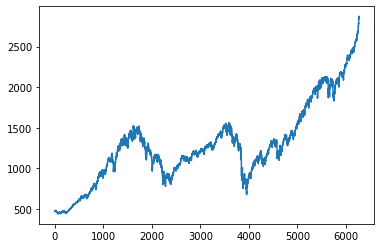

In [9]:
df.spx.plot()

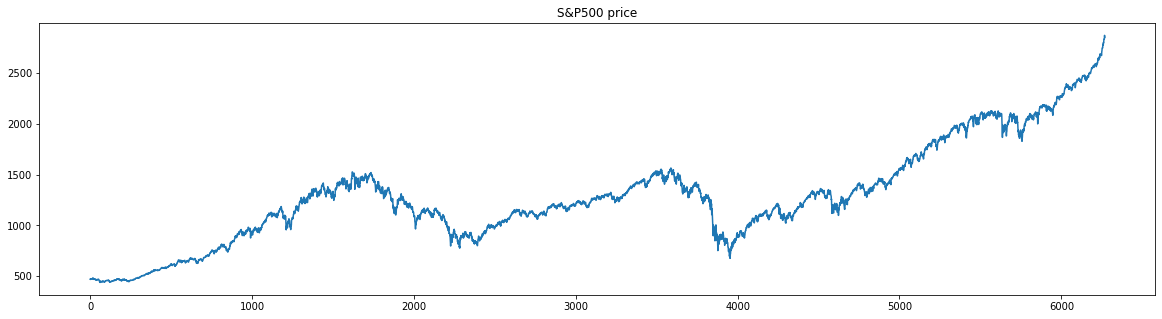

In [10]:
df.spx.plot(figsize=(20,5), title='S&P500 price')
plt.show()

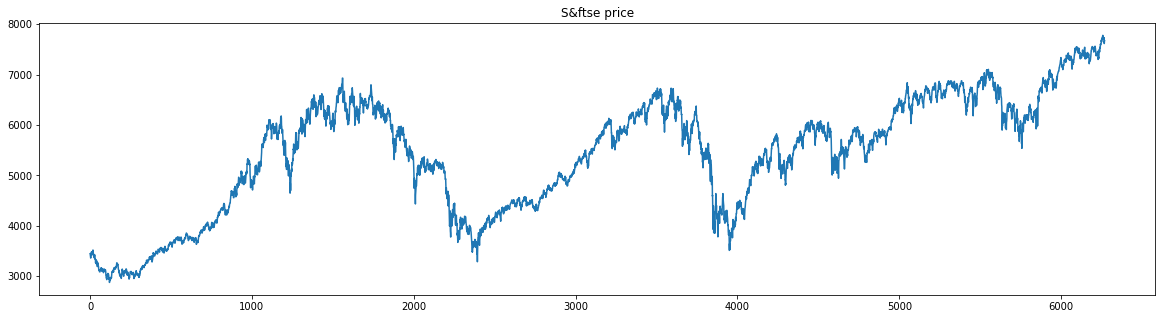

In [11]:
df.ftse.plot(figsize=(20,5), title='S&ftse price')
plt.show()

<AxesSubplot:title={'center':'ftse price'}>

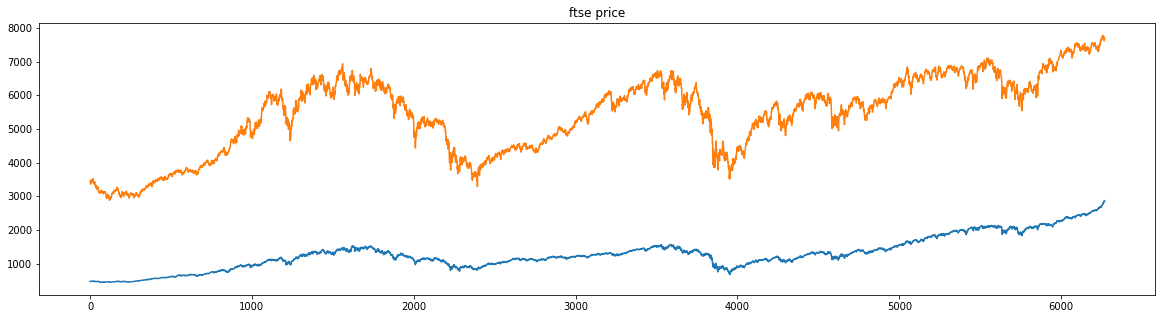

In [12]:
df.spx.plot(figsize=(20,5), title='S&ftse price')
df.ftse.plot(figsize=(20,5), title='ftse price')


In [13]:
import scipy.stats
import pylab

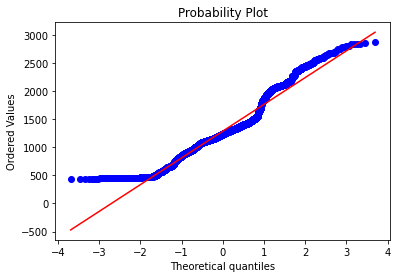

In [15]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

### Data transformation techniques in Time series datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
csv_data = pd.read_csv('./datasets/timeseries_data.csv')
csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


<AxesSubplot:title={'center':'dax price'}>

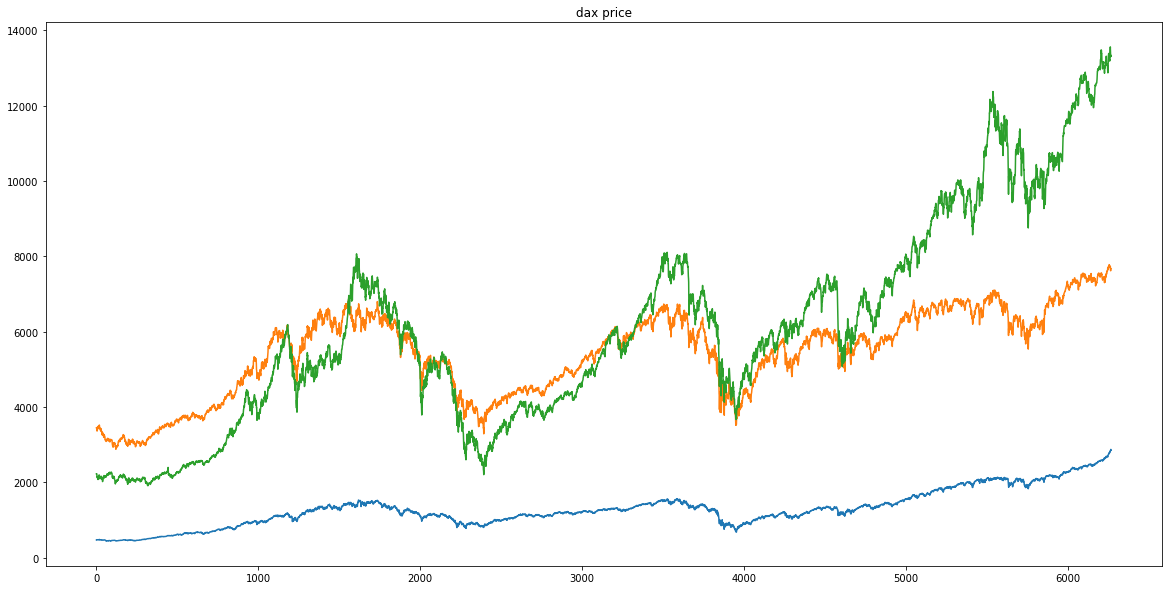

In [5]:
csv_data.spx.plot(figsize=(20,10), title='S&ftse price')
csv_data.ftse.plot(figsize=(20,10), title='ftse price')
csv_data.dax.plot(figsize=(20,10), title='dax price')

<AxesSubplot:title={'center':'nikkei'}>

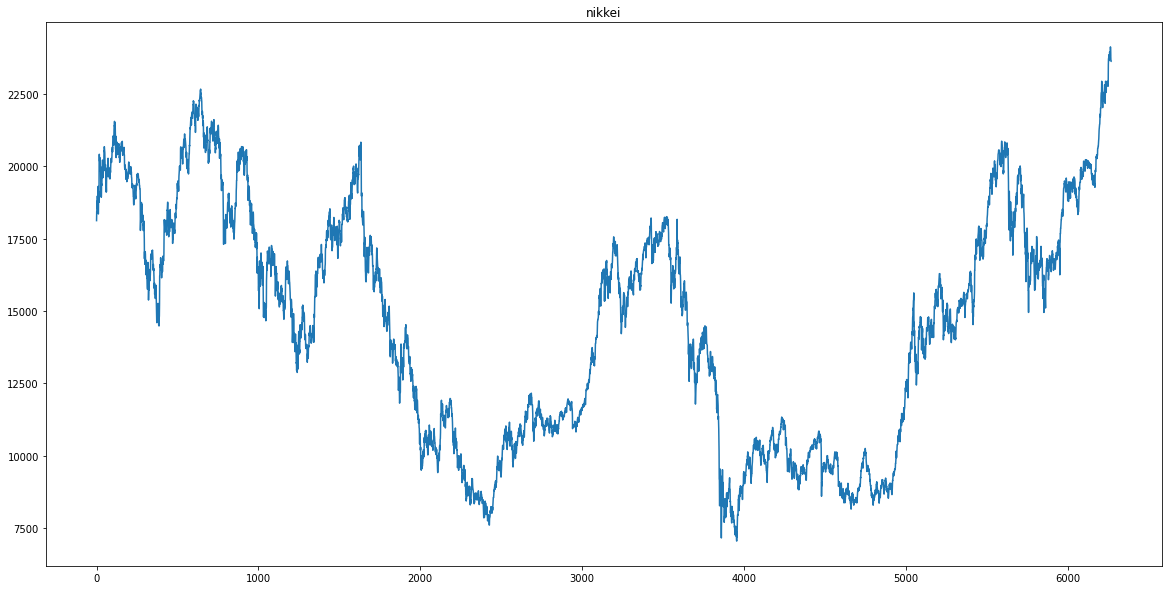

In [6]:
csv_data.nikkei.plot(figsize=(20,10), title='nikkei')

<AxesSubplot:title={'center':'S&ftse price'}>

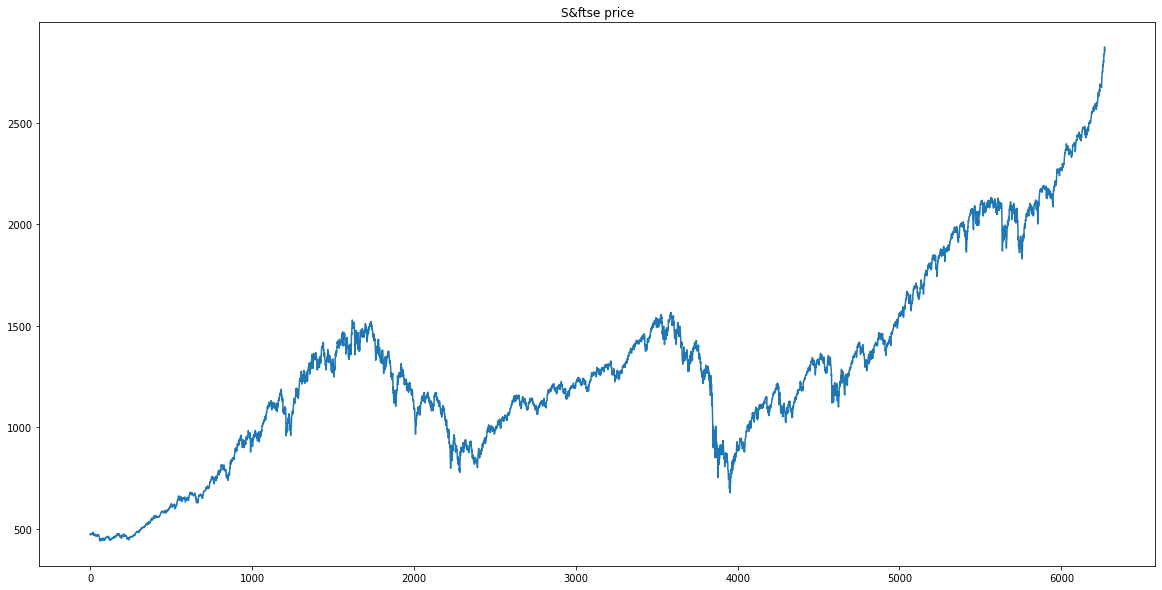

In [8]:
csv_data.spx.plot(figsize=(20,10), title='S&ftse price')


<AxesSubplot:title={'center':'S&ftse price'}>

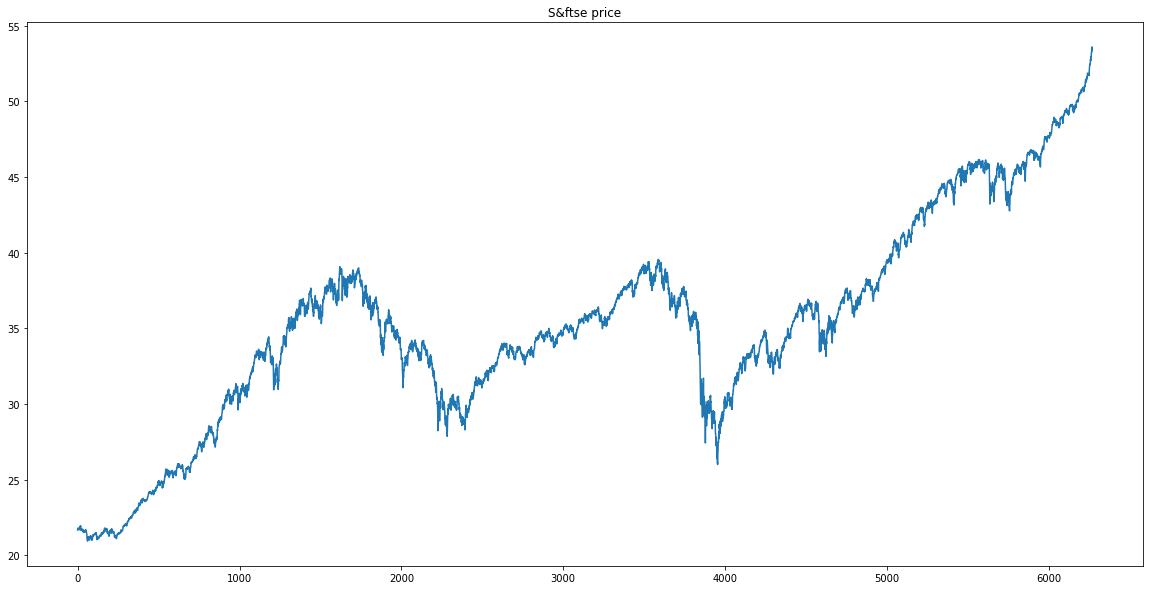

In [10]:
csv_data_spx_squt = np.sqrt(csv_data.spx)
csv_data_spx_squt.plot(figsize=(20,10), title='S&ftse price')


<AxesSubplot:title={'center':'S&ftse price'}>

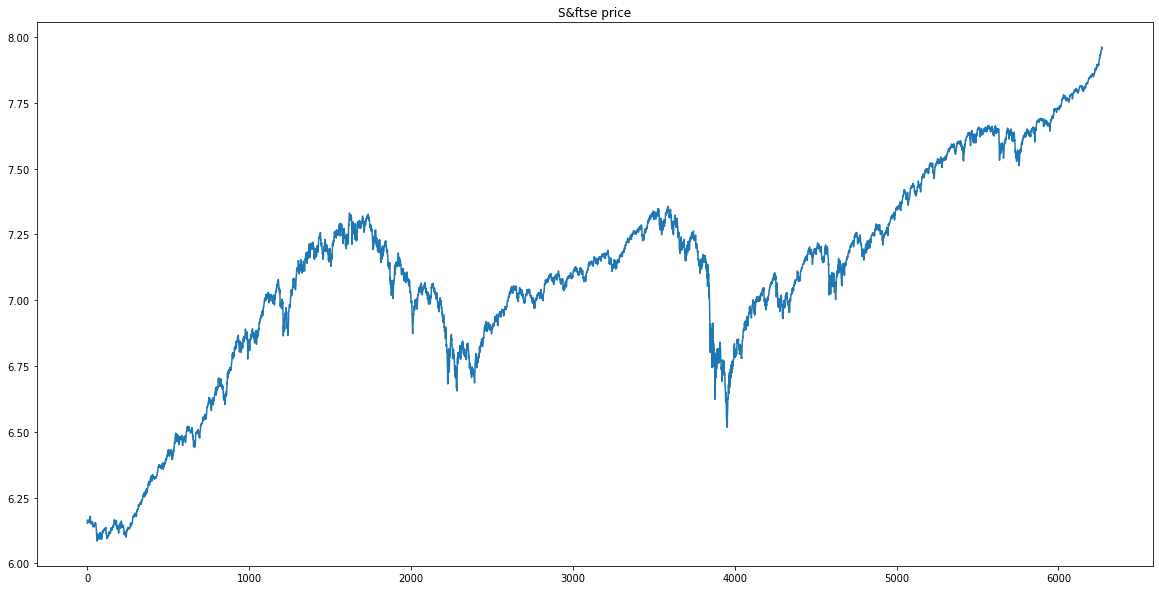

In [13]:
csv_data_spx_log = np.log(csv_data.spx)
csv_data_spx_log.plot(figsize=(20,10), title='S&ftse price')


In [14]:
csv_data_spx_log.describe()

count    6269.000000
mean        7.085584
std         0.400627
min         6.084317
25%         6.898383
50%         7.117546
75%         7.286183
max         7.963066
Name: spx, dtype: float64

<AxesSubplot:title={'center':'S&ftse price'}>

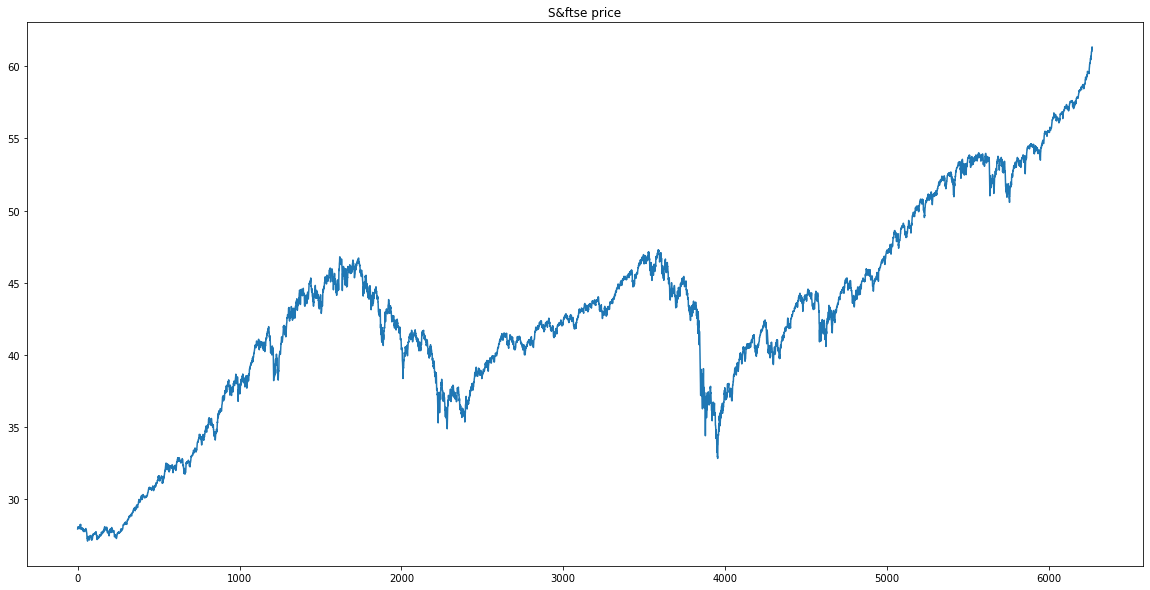

In [23]:
csv_data_spx_box_cox = boxcox(csv_data.spx)
data, lam = csv_data_spx_box_cox = boxcox(csv_data.spx)
csv_data['box_cox_spx']= data
csv_data['box_cox_spx'].plot(figsize=(20,10), title='S&ftse price')
